In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
%matplotlib inline
warnings.filterwarnings('ignore')

# Question 2: Titanic Classification

## Team Members:

### Marcel Santos de Carvalho, id 79083
### Loris Baudry, id
### Alex Palacios, id

### Responsible for this notebook: Marcel Santos de Carvalho

# 1. Load the data

In [2]:
df = pd.read_csv('train.csv')

# 2. Visualise and analyse the data

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2.1 Histograms

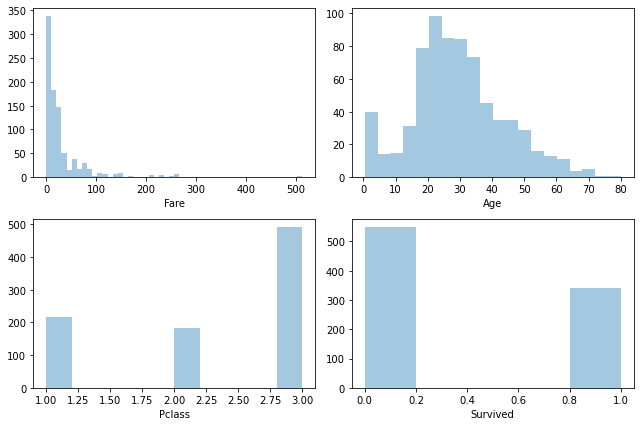

In [8]:
df_hist = df[['Fare', 'Age', 'Pclass', 'Survived']]

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 6))
index=0
ax = ax.flatten()

for col, values in df_hist.items():
    sns.distplot(values, ax=ax[index], kde=False)
    index += 1
plt.tight_layout()

### 2.2 Survivors by feature

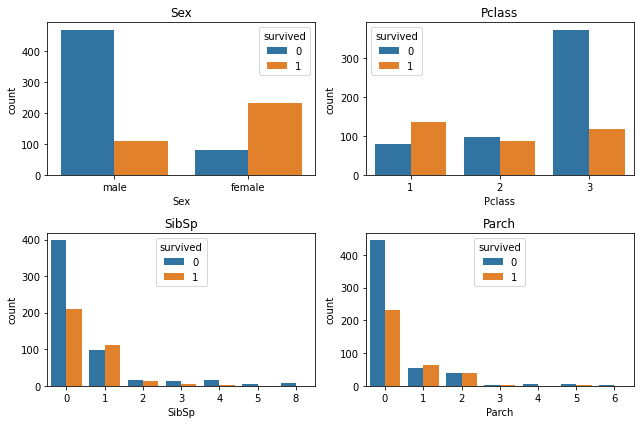

In [9]:
cols = ['Sex', 'Pclass', 'SibSp', 'Parch']
nrows = 2
ncols = 2

fig, axs = plt.subplots(nrows, ncols, figsize = (9, 6))

for r in range(0, nrows):
    for c in range(0, ncols):
        i = r*ncols + c # i goes through the columns
        ax = axs[r][c] # positioning in subplots
        sns.countplot(df[cols[i]], hue=df['Survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived')
plt.tight_layout()

### 2.3 Percentage survived by sex

Text(0.5, 0, 'Percentage of Survivors')

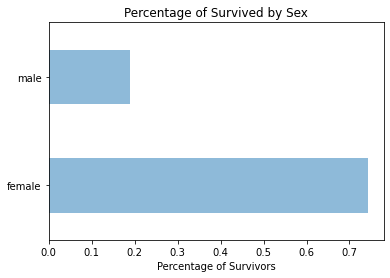

In [10]:
# Since we belive that 'Sex' is an important feature to analyse the label, we will look at percentage of survived by sex
df_survived = df[df.Survived == 1]

plt.title("Percentage of Survived by Sex")
numer = df_survived.Sex.value_counts().sort_index()
denom = df.Sex.value_counts().sort_index()
(numer/denom).plot(kind='barh', alpha=0.5)
plt.xlabel("Percentage of Survivors")

### 2.4 Percentage survived by Class

Text(0.5, 0, 'Percentage of Survivors')

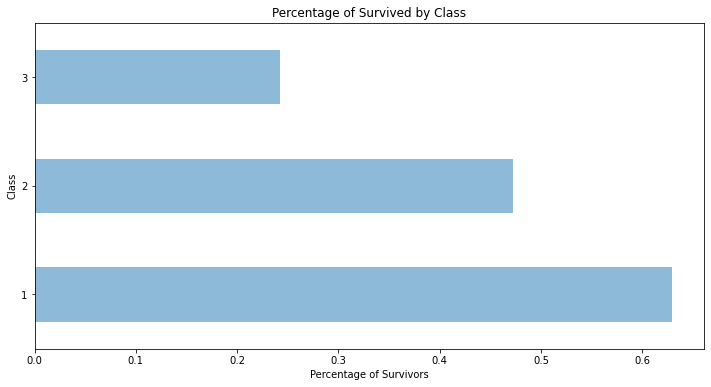

In [11]:
# Since we belive that 'Pclass' is an important feature to analyse the label, we will look at percentage of survived by class
plt.figure(figsize=(12, 6))
plt.title("Percentage of Survived by Class")
numer2 = df_survived.Pclass.value_counts().sort_index()
denom2 = df.Pclass.value_counts().sort_index()
(numer2/denom2).plot(kind='barh', alpha=0.5)
plt.ylabel("Class")
plt.xlabel("Percentage of Survivors")

In [12]:
# Conclusions: 

# We have a data frame with 891 samples, 11 features and 1 label
# We can already spot problems with features 'Age', 'Cabin', 'Embarked'

# Proportionally, women survived more than man
# Porportionally, higher classes (1 being highest) survived more than lower classes (3 being lowest)

# 3. Objective and methodology

In [13]:
# Our aim is to predict the 'survived' column

# We will approach this by:
## (i) Handling categorical and other data
## (ii) Looking for missing data and other issues
## (iii) Visualising and looking for outliers in the data
## (iv) Splitting the data into a 33%/67% train/split
## (v) Using a logistic regression, KNN, decision tree and SVM model to see which performs best
## (vi) Removing one feature at a time and seeing its effect

# 4. Handle categorical and other data

### 4.1 'Embarked' feature

In [14]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
emb_mapping = {'S':1, 'C':2, 'Q':3}
df['EmbMap'] = df.Embarked.map(emb_mapping)
df.drop('Embarked', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,EmbMap
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1.0


### 4.2 'Sex' Feature

In [17]:
sex_mapping = {'male':0, 'female':1}
df['SexMap'] = df.Sex.map(sex_mapping)
df.drop('Sex', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,EmbMap,SexMap
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1.0,0


# 5. Look for missing data and other issues

### 5.1 Missing data in 'Cabin'

In [18]:
# The feature cabin seems to replicate the info in Pclass, given that only higher class passengers have cabins
# Therefore, we are dropping this feature

df.drop('Cabin', axis=1, inplace=True)

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,EmbMap,SexMap
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1.0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2.0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1.0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1.0,0


### 5.2 Missing data in 'Age'

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   EmbMap       889 non-null    float64
 10  SexMap       891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


In [20]:
# We will fill the na data in Age with the average age

averageAge = df['Age'].mean()
averageAge

29.69911764705882

In [21]:
# Checking the average age of survivors to see if there is any significant difference

df_survived['Age'].mean()

28.343689655172415

In [22]:
# There is no significant difference, so we assign the mean to the missing data using .fillna

df['Age'] = df['Age'].fillna(averageAge)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   EmbMap       889 non-null    float64
 10  SexMap       891 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB


### 5.3 Missing data in EmbMap

In [23]:
# We have 2 missing data in EmbMap.

## Since it is only 2 samples, we can simply drop these rows from df

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   EmbMap       889 non-null    float64
 10  SexMap       889 non-null    int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 83.3+ KB


### 5.4 Standarizing the 'Age' feature

In [24]:
type(df.Age.values)

numpy.ndarray

In [25]:
df.Age.values.shape

(889,)

<AxesSubplot:>

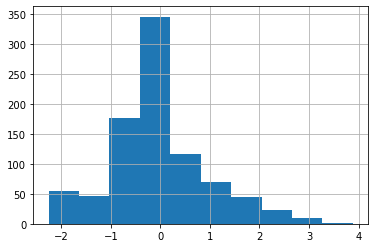

In [26]:
from sklearn.preprocessing import StandardScaler
df['AgeSD'] = StandardScaler().fit_transform(df.Age.values.reshape(-1,1))
df.drop('Age', axis=1, inplace=True)

df.AgeSD.hist()

### 5.5 Removing other redundant features

In [27]:
# We will drop the 'Name', 'PassengerId' and 'Ticket' for they will not help in our analysis

In [28]:
df.drop(['Name'], axis=1, inplace=True)
df.drop(['PassengerId'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)

# 6. Visualise the data and look for outliers to remove

In [29]:
df

,Survived,Pclass,SibSp,Parch,Fare,EmbMap,SexMap,AgeSD
0,0,3,1,0,7.2500,1.0,0,-0.590495
1,1,1,1,0,71.2833,2.0,1,0.643971
2,1,3,0,0,7.9250,1.0,1,-0.281878
3,1,1,1,0,53.1000,1.0,1,0.412509
4,0,3,0,0,8.0500,1.0,0,0.412509
...,...,...,...,...,...,...,...,...
886,0,2,0,0,13.0000,1.0,0,-0.204724
887,1,1,0,0,30.0000,1.0,1,-0.821957
888,0,3,1,2,23.4500,1.0,1,0.003524
889,1,1,0,0,30.0000,2.0,0,-0.281878


In [30]:
# Reordering columns for organization

df = df[['Fare', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD', 'Survived']]

<AxesSubplot:>

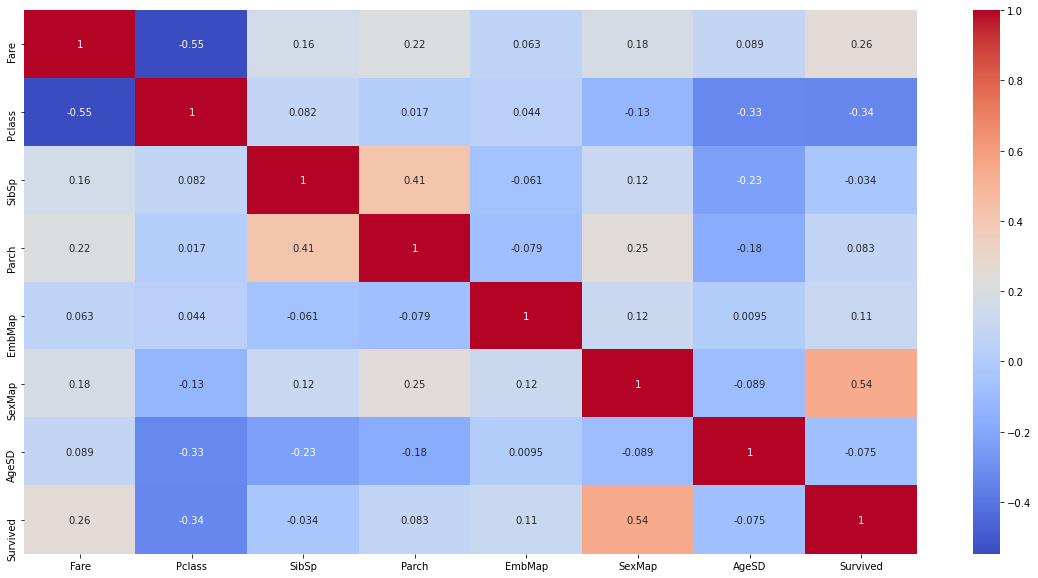

In [31]:
## Plot a correlation matrix to see the correlations between (i) features x label and (ii) features x features

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [32]:
# Brief analysis of correlation matrix:

## As we can observe, 'SexMap' and 'Pclass' are the most relevant features to determine who survived
## Note that 'Fare' also has a relatively high correlation with the label, but it also has a high correlation with 'Pclass'
### which indicates that part of the information provived by these features are duplicated
## We will maintain both for now and see how things go in step 9

# 7. Regression model and train/test split

### 7.1 Creating matrix X and vector y

In [33]:
X = df[['Fare', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']]
y = np.array(df['Survived'])

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    889 non-null    float64
 1   Pclass  889 non-null    int64  
 2   SibSp   889 non-null    int64  
 3   Parch   889 non-null    int64  
 4   EmbMap  889 non-null    float64
 5   SexMap  889 non-null    int64  
 6   AgeSD   889 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.6 KB


In [34]:
y.shape

(889,)

### 7.2 Usefull functions from HelpFunctions

In [2]:
# We will use this function from 'HelpFunctions' to plot the confusion matrices
from sklearn.metrics import plot_confusion_matrix

def plot_cm(clf, X, y, labs):
    
    mpl.rcParams.update({'font.size': 16})
    cm = plot_confusion_matrix(clf, X, y, display_labels=labs,cmap=mpl.cm.Blues);

### 7.3 Defining the 'train' function

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

def train(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=999)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print('Model Report')
    print('Accuracy: ', np.around(accuracy_score(y_test, y_pred),4))
    print('Precision: ', np.around(precision_score(y_test, y_pred),4))
    print('Recall: ', np.around(recall_score(y_test, y_pred),4))
    print('f1: ', np.around(f1_score(y_test, y_pred),4))
    plot_cm(model, X, y, labs=('Not Survived', 'Survived'))

NameError: name 'x' is not defined

# 8. Choosing the best classification model

### 8.1 Logistic Regression

Model Report
Accuracy:  0.8788
Precision:  0.9091
Recall:  0.7692
f1:  0.8333


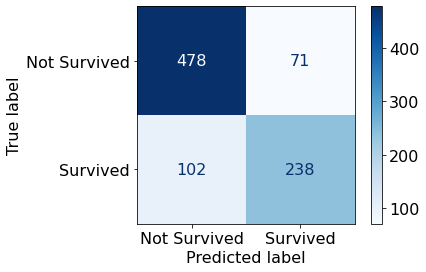

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
train(model, X, y)

### 8.2 KNN

Model Report
Accuracy:  0.8182
Precision:  0.7692
Recall:  0.7692
f1:  0.7692


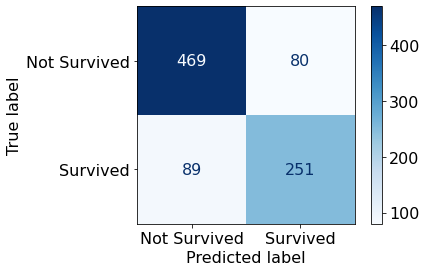

In [38]:
from sklearn.neighbors import KNeighborsClassifier

k=9  # We tested odd k's from 3 to 31, 9 resulted in the best accuracy and precision metrics
model = KNeighborsClassifier(k)
train(model, X, y)

### 8.3 Decision Tree

Model Report
Accuracy:  0.9091
Precision:  1.0
Recall:  0.7692
f1:  0.8696


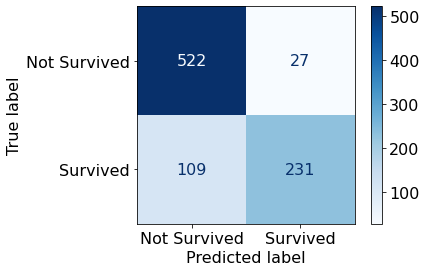

In [39]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from os import system
from graphviz import Source
from IPython.display import SVG

model = DecisionTreeClassifier(random_state=1, max_depth=5)
train(model, X, y)

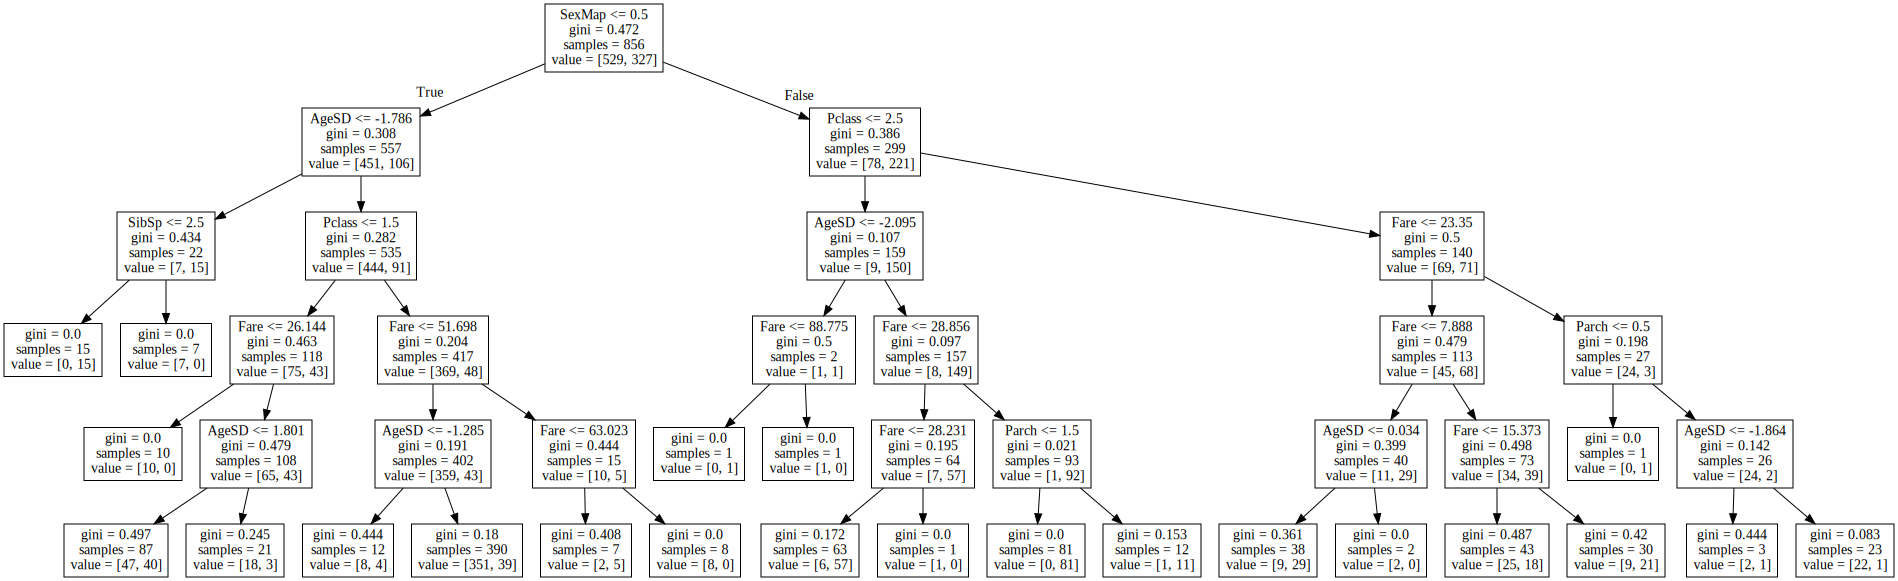

In [40]:
graph = Source(export_graphviz(model, out_file=None, feature_names=['Fare', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']))
SVG(graph.pipe(format='svg'))

### 8.4 SVM

Model Report
Accuracy:  0.8182
Precision:  0.7692
Recall:  0.7692
f1:  0.7692


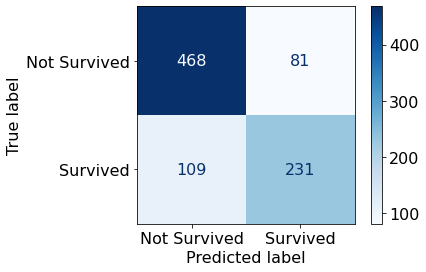

In [41]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=8)
train(model, X, y)

### 8.5 Comparing and choosing final model

In [42]:
L = {'Logistic Regression':[0.8788,0.9091, 0.7692, 0.8333], 'KNN':[0.8182,0.7692, 0.7692, 0.7692], 'Decision Tree':[0.9091,1.0000, 0.7692, 0.8696], 'SVM':[0.8182,0.7692, 0.7692, 0.7692]}

df_results = pd.DataFrame(L, index=['Accuracy', 'Precision', 'Recall', 'F1'])

df_results

,Logistic Regression,KNN,Decision Tree,SVM
Accuracy,0.8788,0.8182,0.9091,0.8182
Precision,0.9091,0.7692,1.0000,0.7692
Recall,0.7692,0.7692,0.7692,0.7692
F1,0.8333,0.7692,0.8696,0.7692


In [43]:
# Conclusion:

## As can be observed in the DataFrame above, the Decision Tree model outperformed the three other models in all 4 metrics analysed
## Therefore, we will continue our analysis using this model

# 9. Removing features and re-training model

In [44]:
# Recapitulating the results of our correlation matrix, we expect 'SexMap' and 'Pclass' to be important features

## We will validate this thesis by removing one feature at a time and re-training the Decision Tree

In [45]:
# We will name the new feature matrices by highlighting the removed feature
## Example: 'X_Fare' is matrice X without the feature 'Fare'

X_Fare = X.drop(['Fare'], axis=1)
X_Pclass = X.drop(['Pclass'], axis=1)
X_SibSp = X.drop(['SibSp'], axis=1)
X_Parch = X.drop(['Parch'], axis=1)
X_EmbMap = X.drop(['EmbMap'], axis=1)
X_SexMap = X.drop(['SexMap'], axis=1)
X_AgeSD = X.drop(['AgeSD'], axis=1)

L_X = [X_Fare, X_Pclass, X_SibSp, X_Parch, X_EmbMap, X_SexMap, X_AgeSD]
L_f = ['Fare', 'Pclass', 'SibSp', 'Parch', 'EmbMap', 'SexMap', 'AgeSD']

In [79]:
results = pd.DataFrame(index=['Accuracy', 'Precision', 'Recall', 'F1'])

In [73]:
def train_2(model, X, y, name='Feature'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, random_state=999)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    stats = [np.around(accuracy_score(y_test, y_pred),4),np.around(precision_score(y_test, y_pred),4),
        np.around(recall_score(y_test, y_pred),4), np.around(f1_score(y_test, y_pred),4)]
    results[name] = stats

In [80]:
model = DecisionTreeClassifier(random_state=1, max_depth=5)

In [81]:
i = 0
for _ in range(0, len(L_X)):
    train_2(model, L_X[_], y, name = L_f[i])    
    i = i + 1
    
results

,Fare,Pclass,SibSp,Parch,EmbMap,SexMap,AgeSD
Accuracy,0.9091,0.8182,0.9091,0.9091,0.9091,0.7273,0.8485
Precision,1.0000,0.7692,1.0000,1.0000,1.0000,0.6429,0.8333
Recall,0.7692,0.7692,0.7692,0.7692,0.7692,0.6923,0.7692
F1,0.8696,0.7692,0.8696,0.8696,0.8696,0.6667,0.8000


In [50]:
# Conclusion:

## The results shown in the DataFrame above are very interesting.
## We can interpret that the features 'Fare', 'SibSp', 'Parch' and 'EmbMap' have no influence in our model whatsoever.
## That is because when we remove them from our model there is no change in the output metrics.
## Therefore, the only features that influence the outputs are 'SexMap', 'Pclass' and 'AgeSD', in the respective order of importance.

# We will train a test matrix X with only the important features in order to double check our findings.

In [82]:
X_test1 = X.drop(['Fare', 'SibSp', 'Parch', 'EmbMap'], axis=1)

train_2(model, X_test1, y, name='Test*')
results

,Fare,Pclass,SibSp,Parch,EmbMap,SexMap,AgeSD,Test*
Accuracy,0.9091,0.8182,0.9091,0.9091,0.9091,0.7273,0.8485,0.8788
Precision,1.0000,0.7692,1.0000,1.0000,1.0000,0.6429,0.8333,0.8462
Recall,0.7692,0.7692,0.7692,0.7692,0.7692,0.6923,0.7692,0.8462
F1,0.8696,0.7692,0.8696,0.8696,0.8696,0.6667,0.8000,0.8462


In [52]:
# As expected, the metrics didn't change significantly, confirming our hyposthesis